<a href="https://colab.research.google.com/github/OmarKhaledAbdlhafez/Covid-19-/blob/master/covid_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd gdrive/My\ Drive/covid

[Errno 2] No such file or directory: 'gdrive/My Drive/covid'
/content/gdrive/My Drive/covid


In [0]:
!ls

best_model.hdf5  images        pneumonia1_model.hdf5  test
gmodel.hdf5	 metadata.csv  pneumonia_model.hdf5   train


In [0]:
import pandas as pd 
df = pd.read_csv('metadata.csv')
df.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 27
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,infiltrate in the upper lobe of the left lung,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [0]:
df.shape

(354, 28)

In [0]:
import os 
print(len(os.listdir('images/')))

345


In [0]:
df['finding'].value_counts()

COVID-19          278
Streptococcus      17
SARS               16
Pneumocystis       15
COVID-19, ARDS     12
ARDS                4
E.Coli              4
No Finding          3
Chlamydophila       2
Legionella          2
Klebsiella          1
Name: finding, dtype: int64

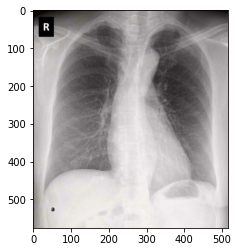

In [0]:
import cv2                 
import matplotlib.pyplot as plt
img= cv2.imread('images/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png')
plt.imshow(img)

In [0]:
covidfiles=[]
for idx, row in df.iterrows():
  t= row['finding']
  filename= row['filename']
  if t=='COVID-19' or t=='COVID-19, ARDS':
    covidfiles.append(filename)

In [0]:
print(len(covidfiles))

290


# Train  data from scratch
in this notebook will use dataset in color rgb and size 128 *128 
frist will train it from scratch

In [0]:
def label_img(img):
  if img in covidfiles:
    return 1
  else :
    return 0

In [0]:
import numpy as np         
import os                
from tqdm import tqdm 
from random import shuffle
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir('images')):
        label = label_img(img)
        path = os.path.join('images',img)
        img =cv2.imread(path)
        img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img =cv2.resize(img, (128,128))
        training_data.append([np.array(img),label])
    shuffle(training_data)
    return training_data

In [0]:
data = create_train_data()

100%|██████████| 345/345 [00:14<00:00, 23.17it/s]


In [0]:
train = data[:-87]
test = data[-87:]
x_train = np.array([i[0] for i in train]).reshape(-1,128,128,3)
y_train = np.array([i[1] for i in train])

x_test = np.array([i[0] for i in test]).reshape(-1,128,128,3)
y_test =np.array([i[1] for i in test])

In [0]:
x_train.shape

(258, 128, 128, 3)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 256)      

In [0]:
model_hist=model.fit(x_train , y_train ,batch_size=32,epochs=10,validation_data=[x_test ,y_test])

Train on 258 samples, validate on 87 samples
Epoch 1/10
258/258 [==============================] - 9s 36ms/step - loss: 54.2900 - accuracy: 0.6512 - val_loss: 1.2093 - val_accuracy: 0.7356
Epoch 2/10
258/258 [==============================] - 9s 35ms/step - loss: 0.6307 - accuracy: 0.7326 - val_loss: 0.8010 - val_accuracy: 0.7356
Epoch 3/10
258/258 [==============================] - 9s 35ms/step - loss: 0.5077 - accuracy: 0.7946 - val_loss: 0.6832 - val_accuracy: 0.7356
Epoch 4/10
258/258 [==============================] - 9s 35ms/step - loss: 0.5334 - accuracy: 0.7984 - val_loss: 0.6074 - val_accuracy: 0.7356
Epoch 5/10
258/258 [==============================] - 9s 35ms/step - loss: 0.5050 - accuracy: 0.8023 - val_loss: 0.5960 - val_accuracy: 0.7356
Epoch 6/10
258/258 [==============================] - 9s 35ms/step - loss: 0.4433 - accuracy: 0.8178 - val_loss: 0.7652 - val_accuracy: 0.7356
Epoch 7/10
258/258 [==============================] - 9s 35ms/step - loss: 0.4631 - accuracy: 0.

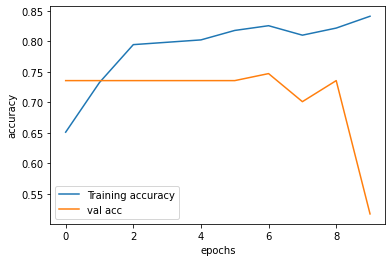

In [0]:
plt.plot(model_hist.history['accuracy'],label='Training accuracy')
plt.plot(model_hist.history['val_accuracy'], label="val acc")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

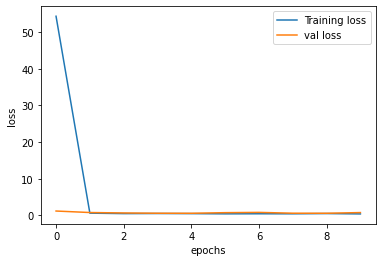

In [0]:
plt.plot(model_hist.history['loss'],label='Training loss')
plt.plot(model_hist.history['val_loss'], label="val loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

try to get more data using data agumention 

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagentrain = ImageDataGenerator(rescale=1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip=True)
datagentest=ImageDataGenerator(rescale=1./255)
train = datagentrain.flow(x_train , y_train , batch_size =32)
test = datagentest.flow(x_test, y_test ,batch_size =32)
model2_hist=model.fit_generator(train ,steps_per_epoch=20,epochs=12,validation_data=test,validation_steps=5)

Epoch 1/12
20/20 [==============================] - 23s 1s/step - loss: 0.6159 - accuracy: 0.8000 - val_loss: 0.6952 - val_accuracy: 0.7483
Epoch 2/12
20/20 [==============================] - 21s 1s/step - loss: 0.5496 - accuracy: 0.7927 - val_loss: 0.5329 - val_accuracy: 0.7324
Epoch 3/12
20/20 [==============================] - 22s 1s/step - loss: 0.4985 - accuracy: 0.7879 - val_loss: 0.5363 - val_accuracy: 0.7254
Epoch 4/12
20/20 [==============================] - 22s 1s/step - loss: 0.4748 - accuracy: 0.8000 - val_loss: 0.5864 - val_accuracy: 0.7483
Epoch 5/12
20/20 [==============================] - 22s 1s/step - loss: 0.5561 - accuracy: 0.7845 - val_loss: 0.5262 - val_accuracy: 0.7394
Epoch 6/12
20/20 [==============================] - 22s 1s/step - loss: 0.5047 - accuracy: 0.8086 - val_loss: 0.4203 - val_accuracy: 0.7183
Epoch 7/12
20/20 [==============================] - 21s 1s/step - loss: 0.5168 - accuracy: 0.7836 - val_loss: 0.5418 - val_accuracy: 0.7483
Epoch 8/12
20/20 [==

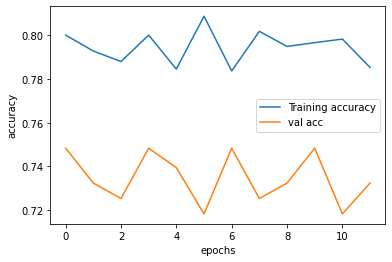

In [0]:
plt.plot(model2_hist.history['accuracy'],label='Training accuracy')
plt.plot(model2_hist.history['val_accuracy'], label="val acc")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

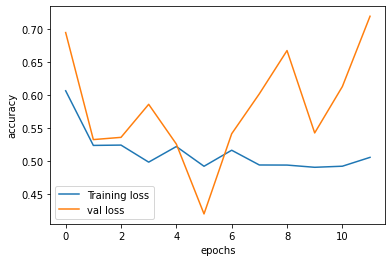

In [0]:
plt.plot(model2_hist.history['loss'],label='Training loss')
plt.plot(model2_hist.history['val_loss'], label="val loss")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Transfer Learning 
try to use a pretrained model and apply it to the dataset 
i use kaggle [Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) dataset and train this dataset and save the model u can see all work [here](https://www.kaggle.com/omarkhald/pneumoni-classification)


*   Frist will use the pre train model without fine tune
*   apply fine tune for some layesr 



In [0]:
from keras.models import load_model
pmodel = load_model('pneumonia_model.hdf5')
pmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 256)      

In [0]:
datagentrain = ImageDataGenerator(shear_range = 0.2,zoom_range = 0.2,horizontal_flip=True)
datagentest=ImageDataGenerator()
train = datagentrain.flow(x_train , y_train , batch_size =32)
test = datagentest.flow(x_test, y_test ,batch_size =32)
pmodel_hist=pmodel.fit_generator(train ,steps_per_epoch=20,epochs=10,validation_data=test,validation_steps=3)

Epoch 1/10
20/20 [==============================] - 21s 1s/step - loss: 48.1151 - accuracy: 0.7600 - val_loss: 0.6786 - val_accuracy: 0.7356
Epoch 2/10
20/20 [==============================] - 21s 1s/step - loss: 0.5945 - accuracy: 0.7931 - val_loss: 0.6392 - val_accuracy: 0.7356
Epoch 3/10
20/20 [==============================] - 22s 1s/step - loss: 0.5038 - accuracy: 0.7902 - val_loss: 0.6517 - val_accuracy: 0.7356
Epoch 4/10
20/20 [==============================] - 20s 1s/step - loss: 0.5368 - accuracy: 0.7945 - val_loss: 0.6443 - val_accuracy: 0.7356
Epoch 5/10
20/20 [==============================] - 22s 1s/step - loss: 0.5071 - accuracy: 0.8017 - val_loss: 0.4627 - val_accuracy: 0.7356
Epoch 6/10
20/20 [==============================] - 20s 1s/step - loss: 0.5045 - accuracy: 0.7964 - val_loss: 0.5748 - val_accuracy: 0.7356
Epoch 7/10
20/20 [==============================] - 21s 1s/step - loss: 0.5270 - accuracy: 0.7862 - val_loss: 0.4655 - val_accuracy: 0.7356
Epoch 8/10
20/20 [=

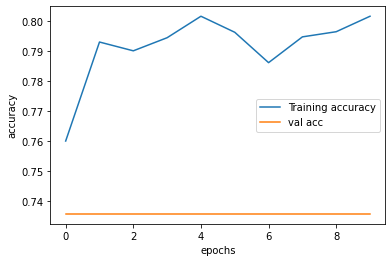

In [0]:
plt.plot(pmodel_hist.history['accuracy'],label='Training accuracy')
plt.plot(pmodel_hist.history['val_accuracy'], label="val acc")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

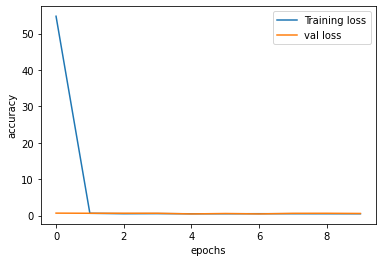

In [0]:
plt.plot(pmodel_hist.history['loss'],label='Training loss')
plt.plot(pmodel_hist.history['val_loss'], label="val loss")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# fine tune 
i made fine tune for the dense layers but the results not good mich and when do visualizing i fine tune the last two layer of conve also it be good little 

In [0]:
for layer in pmodel.layers:
    if layer.name in ['dense_4','dense_5', 'dense_6','conv2d_8','max_pooling2d_8'] :
      layer.trainable = True
    else:
        layer.trainable = False
pmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
pmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 256)      

In [0]:
fmodel2=pmodel.fit_generator(train ,steps_per_epoch=20,epochs=20,validation_data=test,validation_steps=3)

Epoch 1/20
20/20 [==============================] - 11s 543ms/step - loss: 0.4868 - acc: 0.7931 - val_loss: 0.5226 - val_acc: 0.7356
Epoch 2/20
20/20 [==============================] - 10s 488ms/step - loss: 0.5179 - acc: 0.7931 - val_loss: 0.5830 - val_acc: 0.7356
Epoch 3/20
20/20 [==============================] - 10s 490ms/step - loss: 0.5095 - acc: 0.8034 - val_loss: 0.5695 - val_acc: 0.7356
Epoch 4/20
20/20 [==============================] - 10s 491ms/step - loss: 0.4856 - acc: 0.7897 - val_loss: 0.4620 - val_acc: 0.7356
Epoch 5/20
20/20 [==============================] - 10s 490ms/step - loss: 0.5258 - acc: 0.7942 - val_loss: 0.6821 - val_acc: 0.7356
Epoch 6/20
20/20 [==============================] - 10s 501ms/step - loss: 0.4879 - acc: 0.7897 - val_loss: 0.3345 - val_acc: 0.7356
Epoch 7/20
20/20 [==============================] - 10s 490ms/step - loss: 0.5814 - acc: 0.7948 - val_loss: 0.4629 - val_acc: 0.7356
Epoch 8/20
20/20 [==============================] - 10s 493ms/step - 

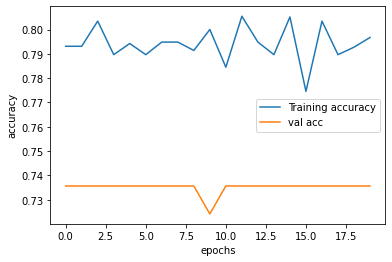

In [0]:
plt.plot(fmodel2.history['acc'],label='Training accuracy')
plt.plot(fmodel2.history['val_acc'], label="val acc")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

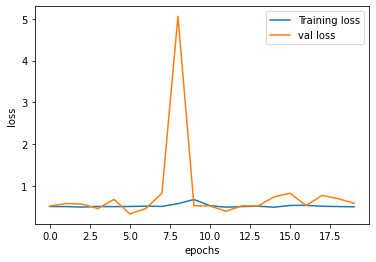

In [0]:
plt.plot(fmodel2.history['loss'],label='Training loss')
plt.plot(fmodel2.history['val_loss'], label="val loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Visualizing the model

In [0]:
pmodel.save('covid_with_ft.hdf5')

In [0]:
covid_model= load_model('covid_with_ft.hdf5')

In [0]:
from keras import models
layer_outputs = [layer.output for layer in covid_model.layers[:8]]
activation_model = models.Model(inputs=covid_model.input, outputs=layer_outputs)

In [0]:
activation_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5_input (InputLayer)  (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0   

In [0]:
from keras.preprocessing import image
path= 'images/'+covidfiles[100]
img=image.load_img(path,target_size=(128, 128))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)

(1, 128, 128, 3)


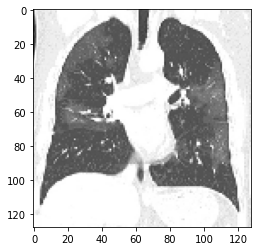

In [0]:
plt.imshow(img)
plt.show()

In [0]:
activations = activation_model.predict(img_tensor)
print(len(activations))

8


In [0]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 126, 126, 32)


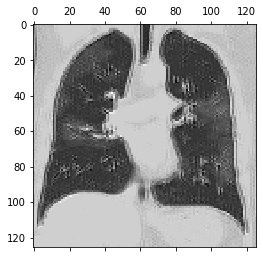

In [0]:
plt.matshow(first_layer_activation[0, :, :, 17],cmap='gray')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


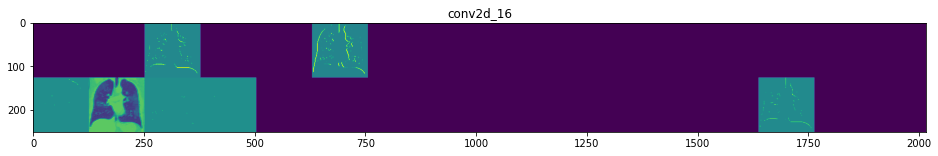

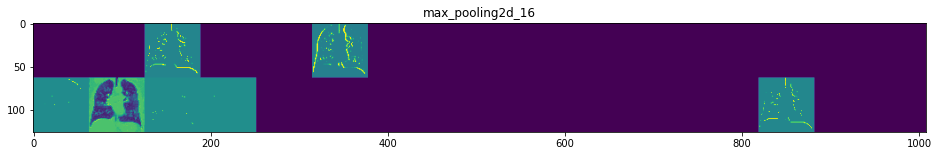

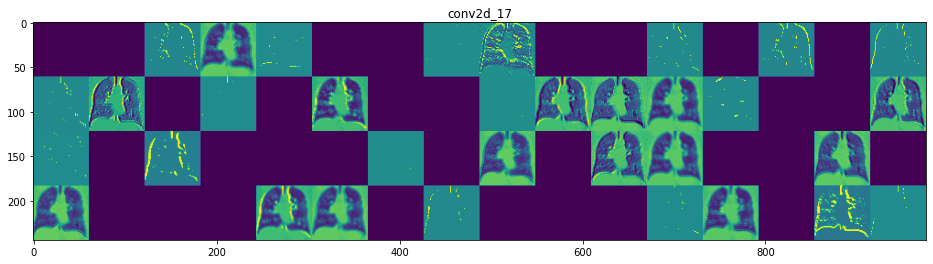

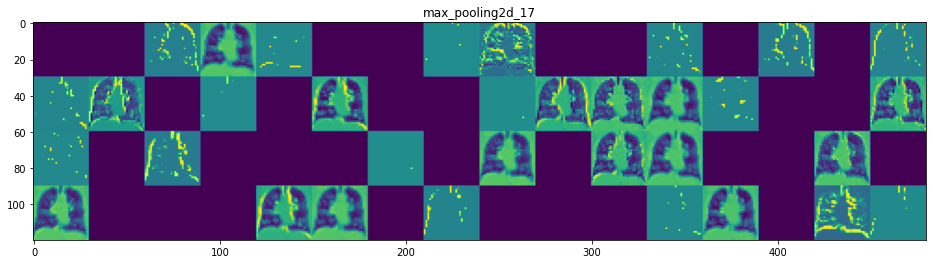

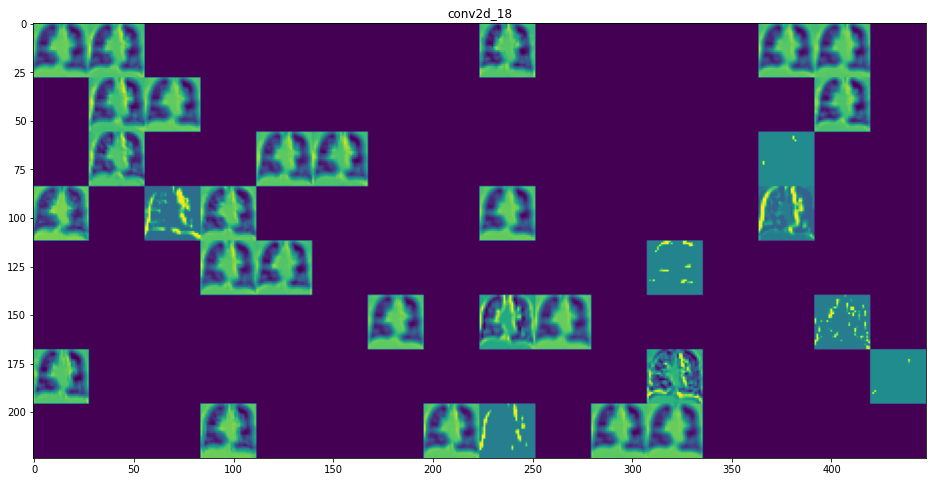

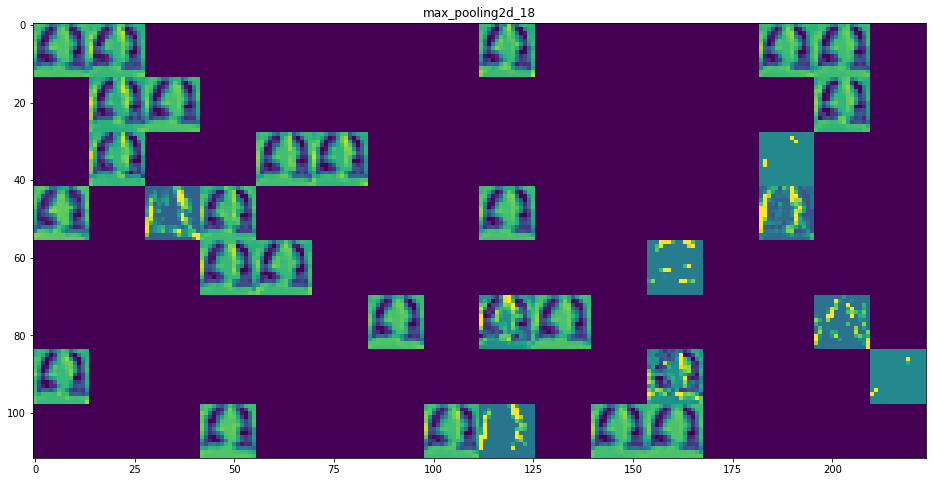

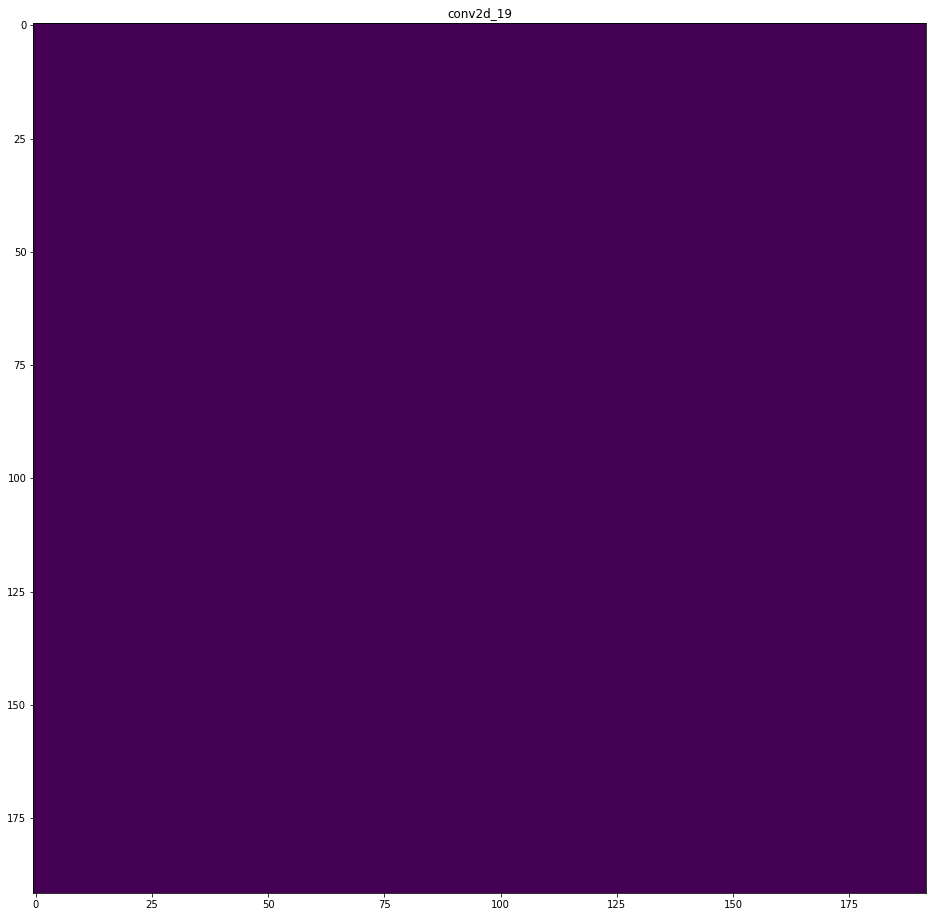

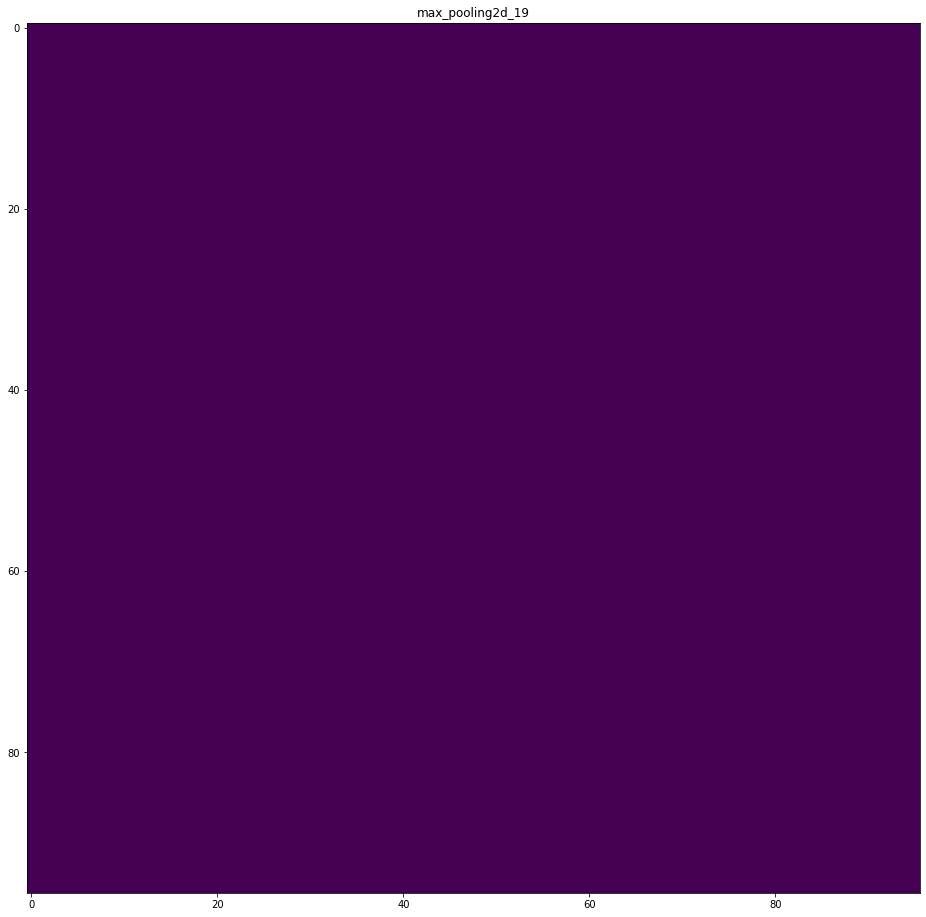

In [0]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()